**Title:** Heart Disease Prediction

**Description:** Heart disease is a significant health concern worldwide, and early prediction can lead to timely interventions, ultimately improving patient outcomes. Thisproject will focus on building neural networks ton develop a Heart Disease Prediction model for predicting the likelihood of an individual developing heart disease based on various health parameters such as chest pain, cholestrol level, heart rate and other characteristic attributes. The target variable is; **output** it has two uniques values. Value 1 means good heart health hence no heart disease. Value 0 means poor heart health thus the likelyhood for a heart disease.


**Description of dataset:**

•    age: The person's age in years

•    sex: The person's sex (1 = male, 0 = female)

•    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

•    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

•    chol: The person's cholesterol measurement in mg/dl

•    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

•    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

•    thalach: The person's maximum heart rate achieved

•    exang: Exercise induced angina (1 = yes; 0 = no)

•    oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

•    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

•    ca: The number of major vessels (0-3)

•    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

•    output: 0 = heart disease, 1 = no heart disease


**Author:** Emmanuel Soumahoro and Faisal Alidu

**Date:** 3rd December 2023

In [ ]:
## Mounting on Google drive
from google.colab import drive
drive.mount('/content/drive')

In [183]:
!pip install scikeras

In [184]:
## Import libraries

import sys
import keras
import sklearn
import warnings
import matplotlib
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf
import seaborn as sns
import missingno as msno
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from imblearn.over_sampling import SMOTE ## For oversampling
warnings.simplefilter(action='ignore', category=Warning) ## Suppress warnings
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,roc_curve, recall_score,
                                  classification_report, f1_score, precision_score)







In [185]:
## To display all the columns of the dataset:
pd.set_option('display.max_columns', None)

## Read the CSV File
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Intro to AI Folder/Final Project/heart.csv')

In [129]:
## View the dataset after reading
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
## View the dataset after reading
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [131]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
## View the number of rows and columns in the dataset
df.shape

(303, 14)

In [ ]:
## The describe function gives information about only numerical columns.
df.describe()

In [ ]:
## The info() function gives some details like the total number of respective datatypes in the dataset
df.info()

In [ ]:
## The columns in the dataset set are all numerical

num = df.select_dtypes(include=['float', 'int'])
print(num.shape)
print('The shape of the extracted numerical columns is the same as the shape of the entire dataset. Hence, the dataset has only numerical columns')
print('\n', num.columns)
print("\n\n", num.head())


### Data Visualization

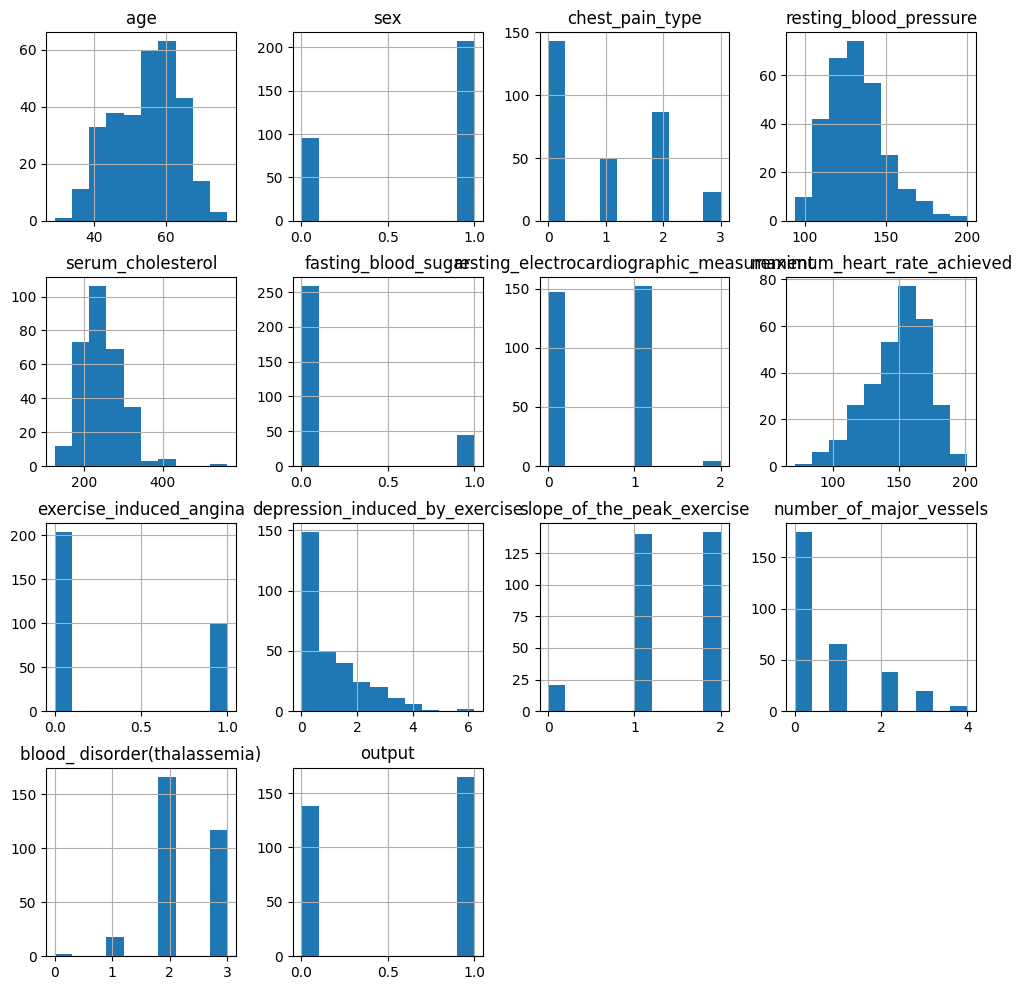

In [122]:
# Create a histogram for all numerical columns in the DataFrame.
df.hist(figsize = (12, 12))

# # Displaying the plot
plt.show()

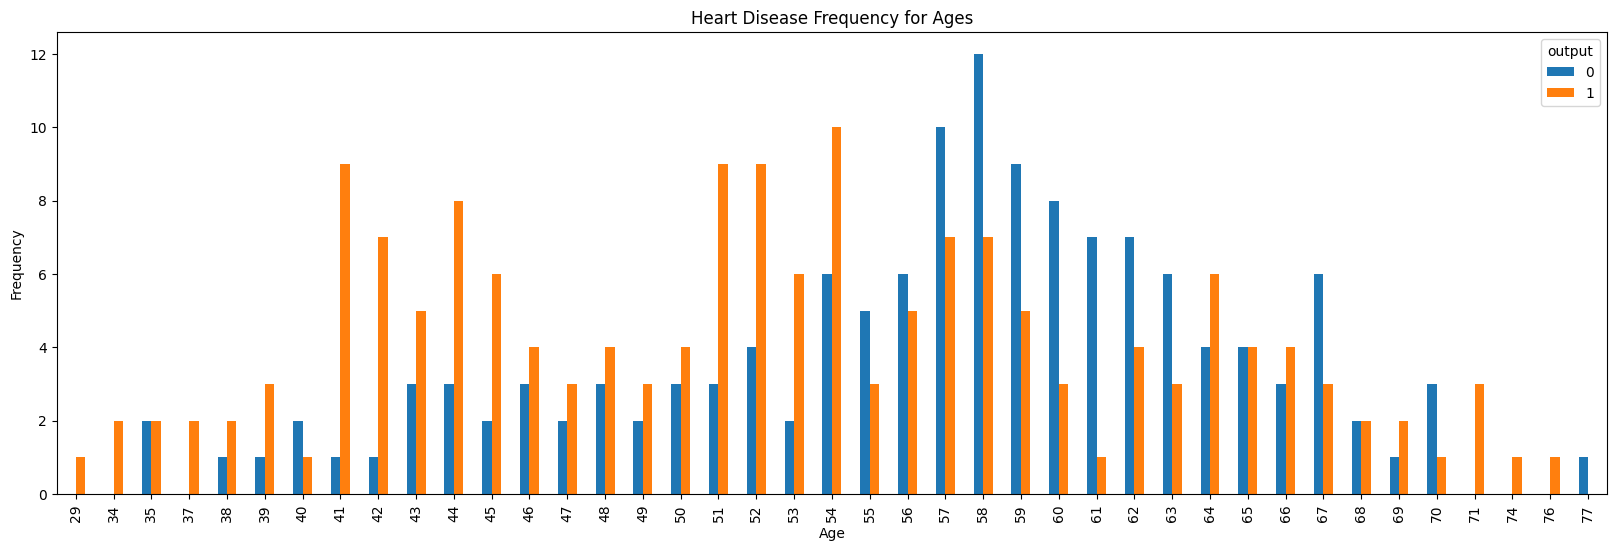

In [123]:
# Creating a cross-tabulation (crosstab) between 'age' and 'output' columns.
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

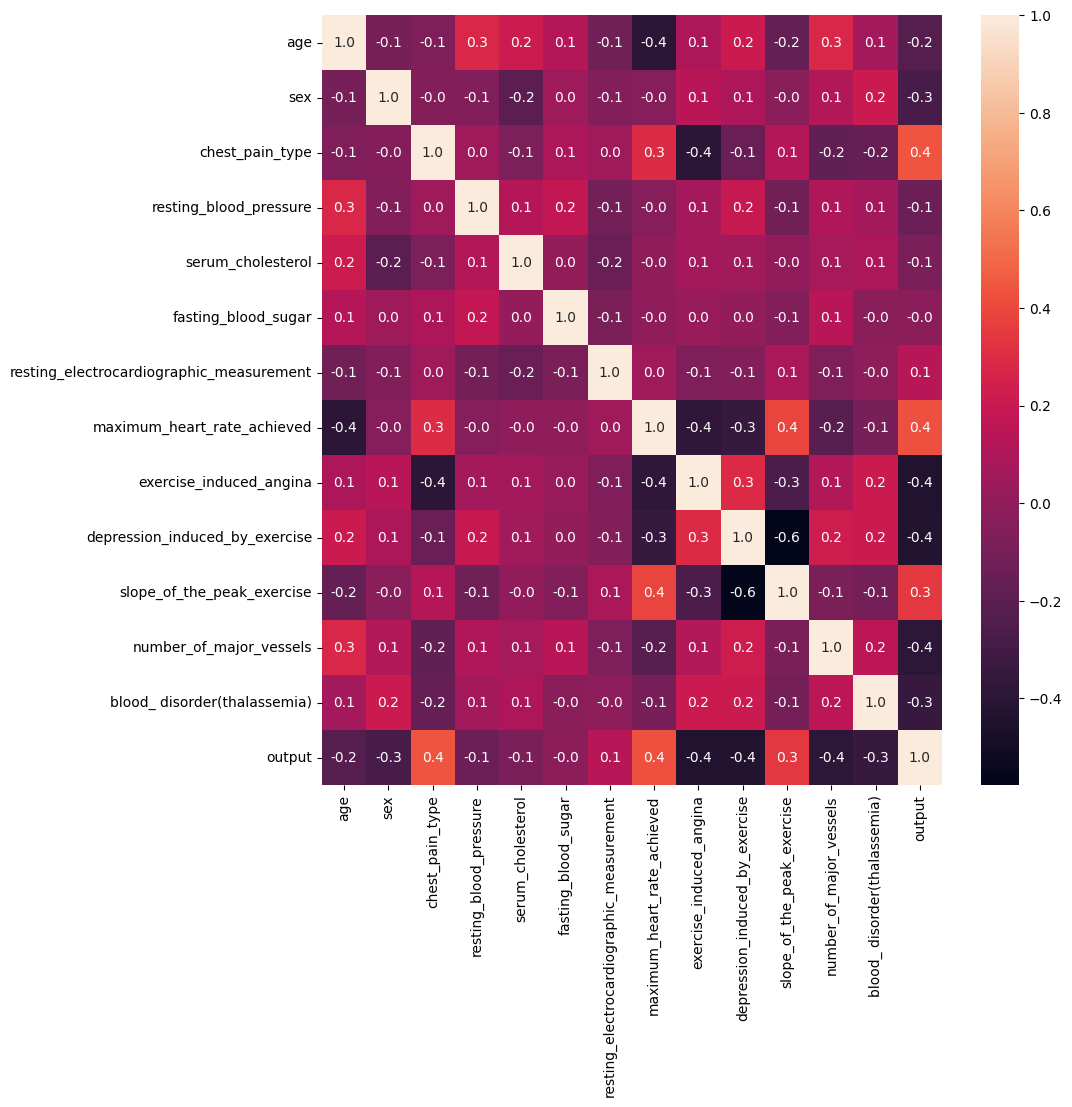

In [124]:
# Creating a correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

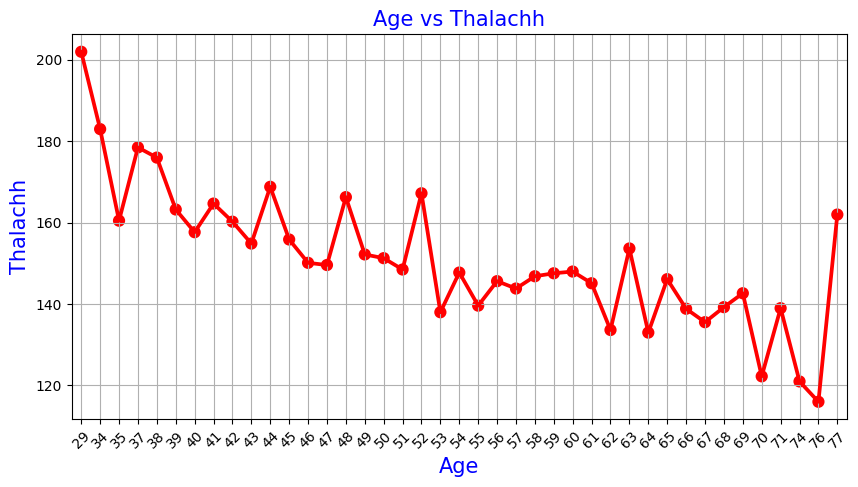

In [132]:
# Performing an analysis of the relationship between age and the mean 'thalachh' values
age_unique = sorted(df.age.unique())
age_thalachh_values = df.groupby('age')['thalachh'].count().values
mean_thalachh = []

for i, age in enumerate(age_unique):
    mean_thalachh.append(sum(df[df['age'] == age].thalachh) / age_thalachh_values[i])

plt.figure(figsize=(10, 5))
sns.pointplot(x=age_unique, y=mean_thalachh, color='red')
plt.xlabel('Age', fontsize=15, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalachh', fontsize=15, color='blue')
plt.title('Age vs Thalachh', fontsize=15, color='blue')
plt.grid()
plt.show()


### Exploratory Data Analysis

In [133]:
## An 0verview of the data
def data_overiew(df, message):
    print(f'{message}:')
    print('\n\nNumber of rows: ', df.shape[0])
    print("Number of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:",df.isnull().sum().values.sum())
    print("\n\nUnique values:")
    print(df.nunique())

data_overiew(df, 'Overview of the dataset')

Overview of the dataset:


Number of rows:  303
Number of features: 14

Data Features:
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

Missing values: 0


Unique values:
age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [25]:
## View each distinct age in the dataset
df['age'].unique()


array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [26]:
## View each distinct sex in the dataset
df['sex'].unique()

array([1, 0])

In [27]:
## View each distinct chest_pain_type in the dataset
df['cp'].unique()

array([3, 2, 1, 0])

In [28]:
## View each distinct resting_blood_pressure in the dataset
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [29]:
## View each distinct serum_cholesterol in the dataset
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [30]:
## View each distinct fasting_blood_sugar in the dataset
df['fbs'].unique()

array([1, 0])

In [31]:
## View each distinct resting_electrocardiographic_measurement in the dataset
df['restecg'].unique()

array([0, 1, 2])

In [32]:
## View each distinct maximum_heart_rate_achieved in the dataset
df['thalachh'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [33]:
## View each distinct exercise_induced_angina in the dataset
df['exng'].unique()

array([0, 1])

In [34]:
## View each distinct depression_induced_by_exercise in the dataset
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [35]:
## View each distinct slope_of_the_peak_exercise in the dataset
df['slp'].unique()

array([0, 2, 1])

In [36]:
## View each distinct number_of_major_vessels in the dataset
df['caa'].unique()

array([0, 2, 1, 3, 4])

In [37]:
## View each distinct blood_ disorder(thalassemia) in the dataset
df['thall'].unique()

array([1, 2, 3, 0])

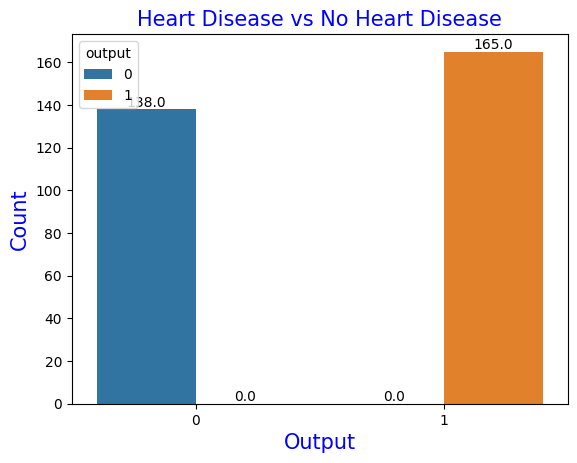


The number of counts for the output:
1    165
0    138
Name: output, dtype: int64

Heart Disease Percentage: 45.54

No Heart Disease Percentage: 54.46


In [38]:
## Display the number of counts for the output. Notte that 0 means Heart Disease, 1 means no Heart Disease
ax = sns.countplot(x="output", data=df, hue="output")

# Display the count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Output', fontsize=15, color='blue')
plt.ylabel('Count', fontsize=15, color='blue')
plt.title('Heart Disease vs No Heart Disease', fontsize=15, color='blue')
plt.show()

target_temp = df.output.value_counts()
print('\nThe number of counts for the output:', )
print(target_temp)

print("\nHeart Disease Percentage: "+str(round(target_temp[0]*100/303,2)))
print("\nNo Heart Disease Percentage: "+str(round(target_temp[1]*100/303,2)))

**0 --> Heart Disease Positive**

**1 --> Healthy, no Heart Disease**

*165 (54%) patients  have healthy Heart while 138 (46%) have Heart disease.*

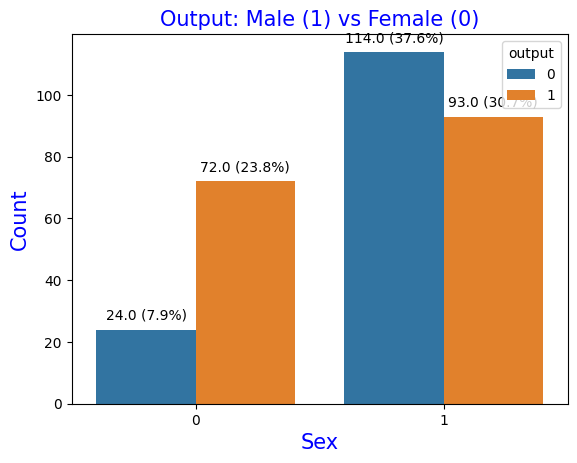

In [39]:
# Explore the number of males and female who have or do not have heart disease
ax = sns.countplot(x="sex", data=df, hue="output")

# Display the count and percentage values on top of the bars
total_height = len(df)  # Total number of samples

for p in ax.patches:
    count = p.get_height()
    percentage = count / total_height * 100

    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sex', fontsize=15, color='blue')
plt.ylabel('Count', fontsize=15, color='blue')
plt.title('Output: Male (1) vs Female (0)', fontsize=15, color='blue')
plt.show()

*According to this dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%. Woman may experience a heart attack with no chest pressure at all, they usually experience nausea or vomiting which are often confused with acid reflux or the flu.*

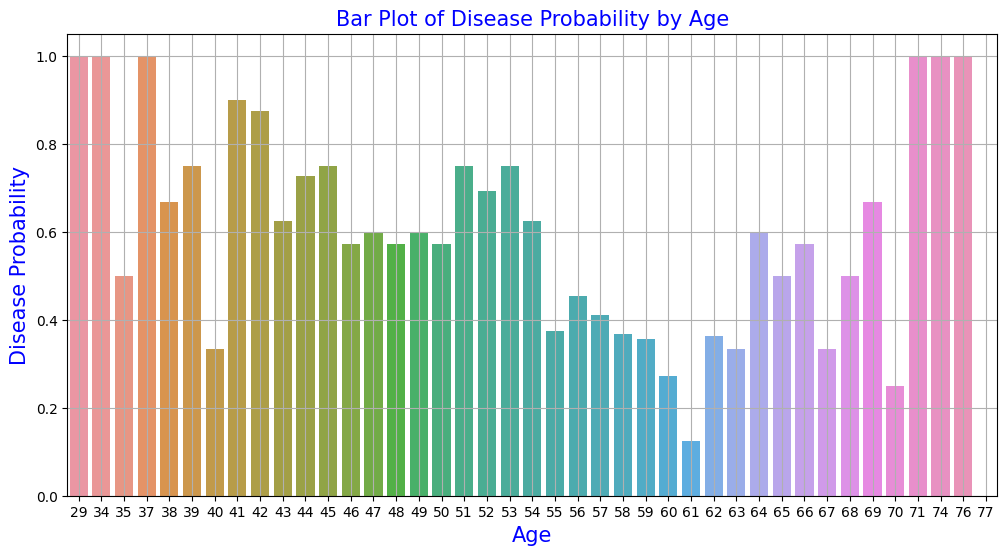

In [40]:
# Display the distribution of disease probability by age
def plotAge():
    avg = df.groupby(['age'], as_index=False)['output'].mean()

    plt.figure(figsize=(12, 6))

    sns.barplot(x='age', y='output', data=avg)

    plt.xlabel('Age', fontsize=15, color='blue')
    plt.ylabel('Disease Probability', fontsize=15, color='blue')
    plt.title('Bar Plot of Disease Probability by Age', fontsize=15, color='blue')
    plt.grid(True)
    plt.show()

plotAge()

In [41]:
# Here 0 is female and 1 is male patients
target_temp = df.sex.value_counts()
countFemale = target_temp[0]
countMale = target_temp[1]
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

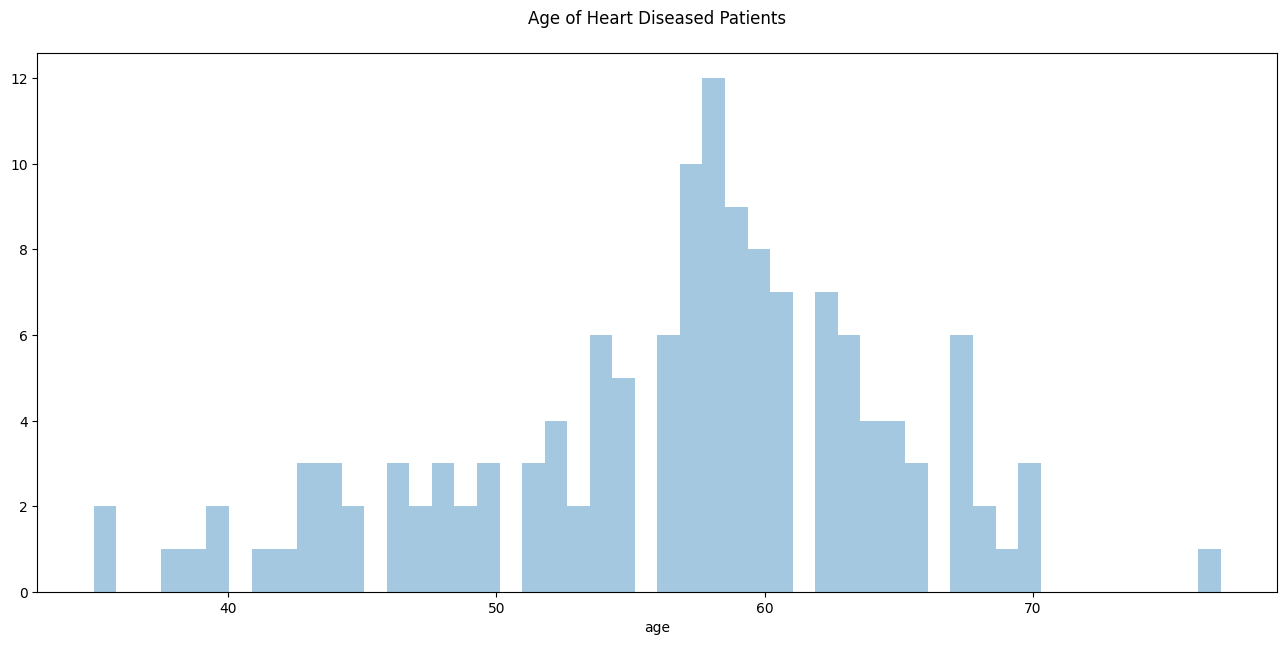

In [43]:
# Display the age of Heart Diseased Patirnts
plt.figure(figsize=(16,7))
sns.distplot(df[df['output']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

*Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it's rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.*

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

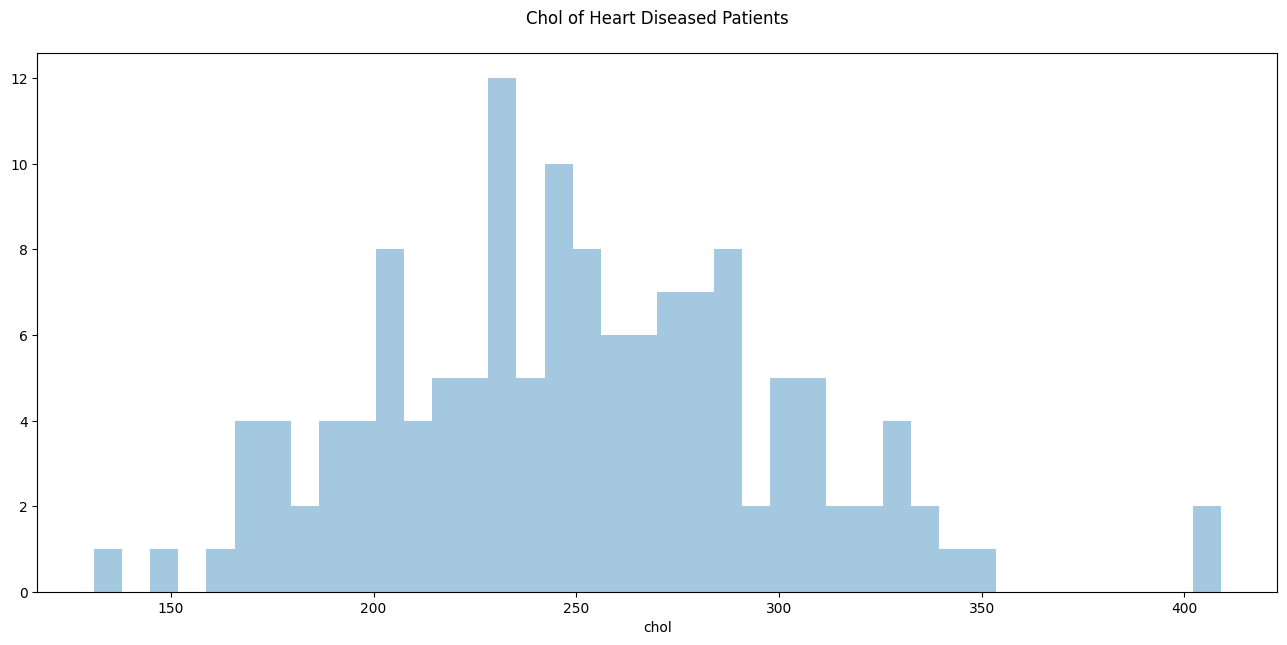

In [44]:
# Display the serum_cholesterol level of Heart diseased patients
plt.figure(figsize=(16,7))
sns.distplot(df[df['output']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

*In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL). Borderlines are considered to be high between 200 to 239 mg / dL and 240 mg / dL and above. LDL (bad cholesterol) should contain less than 100 mg / dL of cholesterol. 100 mg / dl rates for individuals without any health issue are appropriate but may be more relevant for those with cardiac problems or risk factors for heart disease. The levels are borderline moderate between 130 and 159 mg / dL and moderate between 160 and 189 mg / dL. The reading is very high at or above 190 mg / dL. Levels of HDL (good cholesterol) are to be maintained higher. The risk factor for cardiovascular diseases is called a reading less than 40 mg / dL. Borderline low is considered to be between 41 mg / dL and 59 mg / dL. The HDL level can be measured with a maximum of 60 mg / dL.*

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

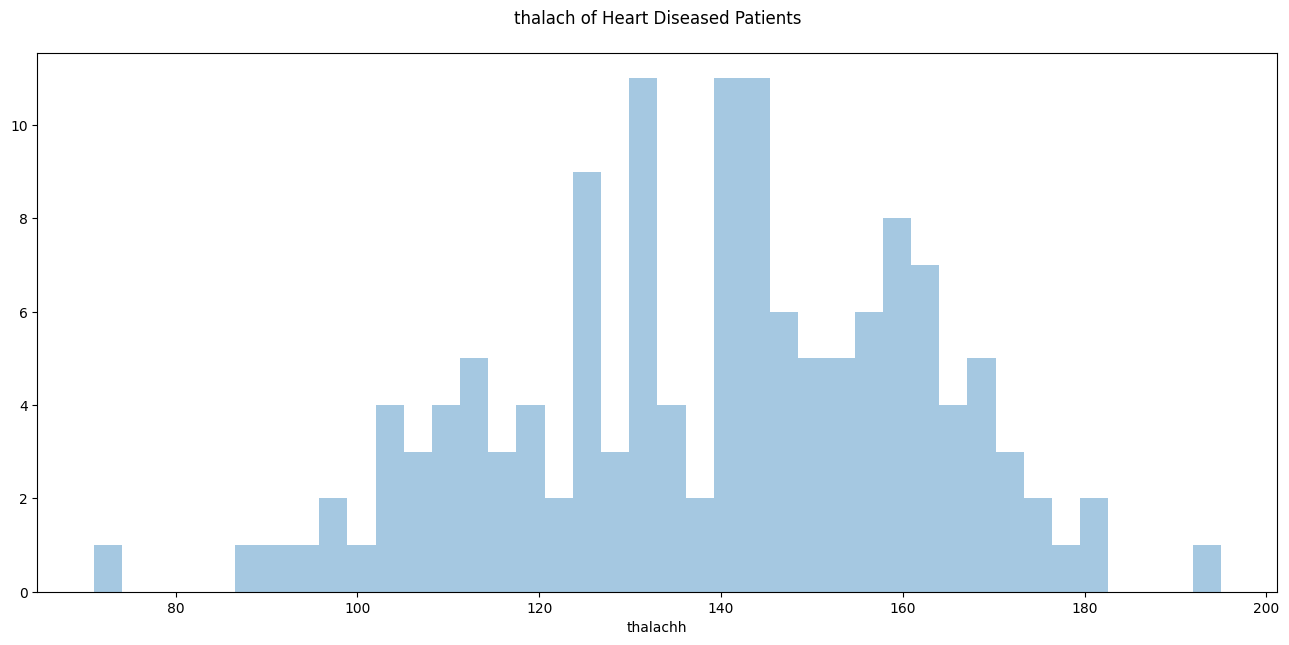

In [45]:
# Display the maximum_heart_rate_achieved in Heart Diseased patients
plt.figure(figsize=(16,7))
sns.distplot(df[df['output']==0]['thalachh'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

### Feature Selection

In [186]:
## Renaming columns
df.rename(columns={'cp':'chest_pain_type', }, inplace=True)
df.rename(columns={'trtbps':'resting_blood_pressure', }, inplace=True)
df.rename(columns={'chol':'serum_cholesterol', }, inplace=True)
df.rename(columns={'fbs':'fasting_blood_sugar', }, inplace=True)
df.rename(columns={'restecg':'resting_electrocardiographic_measurement', }, inplace=True)
df.rename(columns={'thalachh':'maximum_heart_rate_achieved', }, inplace=True)
df.rename(columns={'exng':'exercise_induced_angina', }, inplace=True)
df.rename(columns={'oldpeak':'depression_induced_by_exercise', }, inplace=True)
df.rename(columns={'slp':'slope_of_the_peak_exercise', }, inplace=True)
df.rename(columns={'caa':'number_of_major_vessels', }, inplace=True)
df.rename(columns={'thall':'blood_ disorder(thalassemia)', }, inplace=True)

In [ ]:
df.head()

In [188]:
X = df.drop(['output'], axis = 1)
y = df['output']

In [ ]:
X.shape

(303, 13)

In [189]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

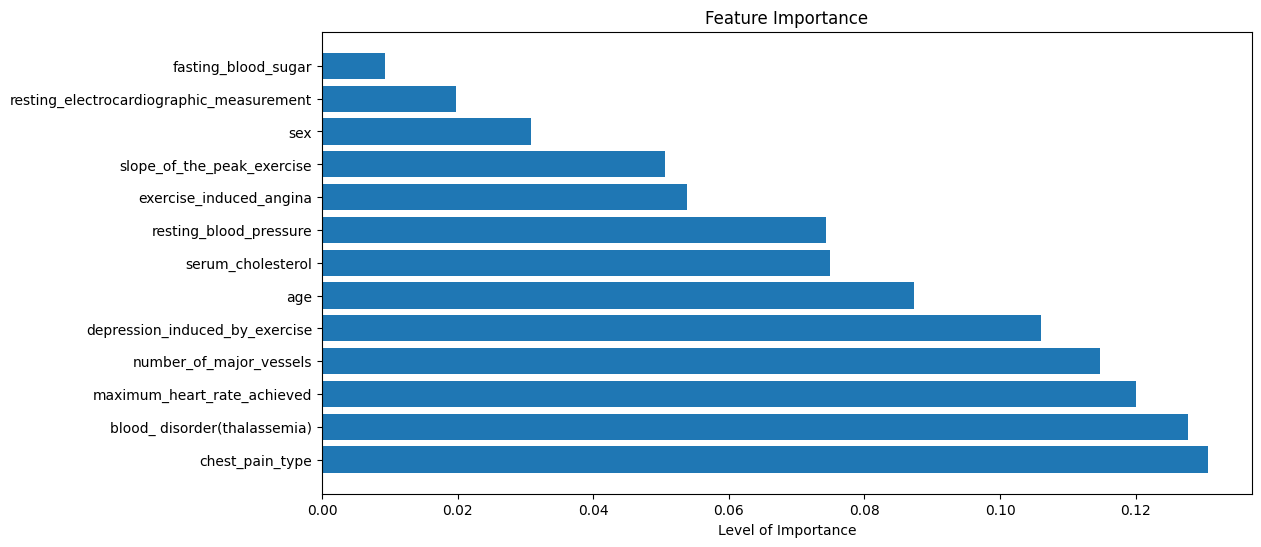



Relevant features:
['chest_pain_type' 'blood_ disorder(thalassemia)'
 'maximum_heart_rate_achieved' 'number_of_major_vessels'
 'depression_induced_by_exercise' 'age' 'serum_cholesterol'
 'resting_blood_pressure' 'exercise_induced_angina'
 'slope_of_the_peak_exercise' 'sex'
 'resting_electrocardiographic_measurement' 'fasting_blood_sugar']


In [190]:
rfc = RandomForestClassifier()

# Fit the classifier
rfc.fit(X, y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame to store feature names and their importances
df2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df2 = df2.sort_values(by='Importance', ascending=False)

# Plot feature importances
top_features = 15  # Change this value to plot a different number of top features
plt.figure(figsize=(12, 6))
plt.barh(df2['Feature'][:top_features], df2['Importance'][:top_features])
plt.xlabel('Level of Importance')
plt.title('Feature Importance')
plt.show()
relevant_features=df2['Feature'][:top_features].values

# Display the list of important features
print("\n\nRelevant features:")
print(relevant_features)

### Training  and Model Creation

In [191]:
X = df[relevant_features]
y = df['output']

In [141]:
X.shape

(303, 13)

In [142]:
X.head()

,chest_pain_type,maximum_heart_rate_achieved,number_of_major_vessels,blood_ disorder(thalassemia),age,depression_induced_by_exercise,resting_blood_pressure,serum_cholesterol,exercise_induced_angina,slope_of_the_peak_exercise,sex,resting_electrocardiographic_measurement,fasting_blood_sugar
0,3,150,0,1,63,2.3,145,233,0,0,1,0,1
1,2,187,0,2,37,3.5,130,250,0,0,1,1,0
2,1,172,0,2,41,1.4,130,204,0,2,0,0,0
3,1,178,0,2,56,0.8,120,236,0,2,1,1,0
4,0,163,0,2,57,0.6,120,354,1,2,0,1,0


In [192]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
# Perform Feature Scaling on X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [58]:
X_train

array([[ 0.00809909, -0.50904773, -0.92086403, ...,  0.72250438,
         0.8431327 , -0.38330071],
       [-0.97189094,  1.17848036, -0.19378705, ...,  0.72250438,
        -1.04610909, -0.38330071],
       [ 0.98808912, -0.50904773,  2.3509824 , ...,  0.72250438,
         0.8431327 , -0.38330071],
       ...,
       [ 1.96807914, -0.50904773, -0.82997941, ...,  0.72250438,
        -1.04610909,  2.60891771],
       [-0.97189094,  1.17848036, -0.19378705, ...,  0.72250438,
        -1.04610909, -0.38330071],
       [ 0.00809909, -0.50904773, -0.92086403, ..., -1.38407465,
         0.8431327 , -0.38330071]])

In [ ]:
X_test

In [194]:
## View the dimension of the training data and testing data
X_train.shape, y_test.shape, y_train.shape, X_test.shape

((242, 13), (61,), (242,), (61, 13))

### Building the Model Using Neural Networks

In [195]:
# Convert into binary classification problem - heart disease or no heart disease

# Copying the target variable from the training set to a new variable Y_train_binary
Y_train_binary = y_train.copy()

# Copying the target variable from the test set to a new variable Y_test_binary
Y_test_binary = y_test.copy()

# Converting the values in Y_train_binary to binary classification.
# Any value greater than 0 (indicating the presence of heart disease) is set to 1, indicating a positive class.
Y_train_binary[Y_train_binary > 0] = 1

# Converting the values in Y_test_binary to binary classification.
# Any value greater than 0 (indicating the presence of heart disease) is set to 1, indicating a positive class.
Y_test_binary[Y_test_binary > 0] = 1

# Printing the first 20 values of the modified Y_train_binary
print(Y_train_binary[:20])


132    1
202    0
196    0
75     1
176    0
59     1
93     1
6      1
177    0
30     1
22     1
258    0
56     1
242    0
114    1
287    0
282    0
197    0
158    1
164    1
Name: output, dtype: int64


In [196]:
## Model 1: Building a Multi-layer perceptron using sequential API

# define a keras model
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_311 (Dense)           (None, 16)                224       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_312 (Dense)           (None, 8)                 136       
                                                                 
 dropout_27 (Dropout)        (None, 8)                 0         
                                                                 
 dense_313 (Dense)           (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [197]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=100, batch_size=10)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.6719 - accuracy: 0.7479 - val_loss: 0.6554 - val_accuracy: 0.8361
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.7645 - val_loss: 0.6185 - val_accuracy: 0.8525
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6054 - accuracy: 0.7975 - val_loss: 0.5725 - val_accuracy: 0.8525
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5582 - accuracy: 0.8347 - val_loss: 0.5234 - val_accuracy: 0.8689
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5420 - accuracy: 0.8182 - val_loss: 0.4828 - val_accuracy: 0.8689
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.8306 - val_loss: 0.4379 - val_accuracy: 0.8689
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.8388 - val_loss: 0.4087 - val_accuracy: 0.8852
Epoch 8/100


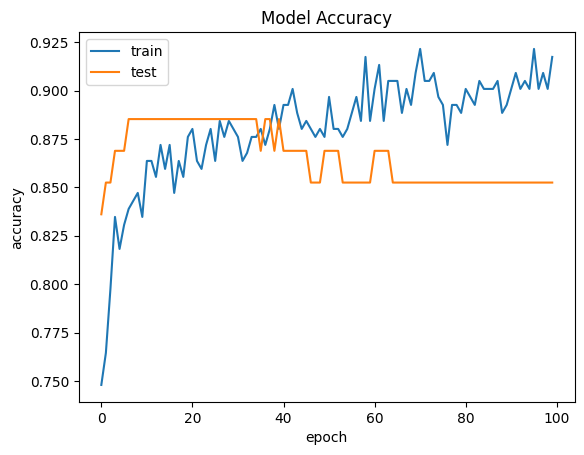

In [198]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


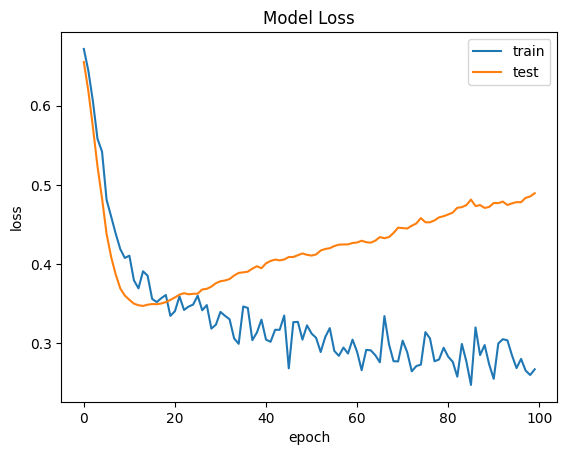

In [200]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [201]:
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print("\nResults for Binary Model")
print("\naccuracy_score:",accuracy_score(Y_test_binary, binary_pred))
print("\nclassification_report:")
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 9ms/step

Results for Binary Model

accuracy_score: 0.8524590163934426

classification_report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [202]:
## Model 2: Define the architecture of the neural network using the Functional API

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Dense layers
dense_layer_1 = Dense(64, activation='relu')(input_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer, name="model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

## Display the model summary
model.summary()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC Score: {roc_auc:.4f}')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_97 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_314 (Dense)           (None, 64)                896       
                                                                 
 dense_315 (Dense)           (None, 32)                2080      
                                                                 
 dense_316 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 10ms/step - loss: 0.7546 - accuracy: 0.8525
Test Loss: 0.7546412944793701, Test Accuracy: 0.8524590134620667
2/2 [===

In [203]:
# Model 3 : Define a more complex architecture using the Functional API

# Input layer
input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

# Dense layers with increased complexity, dropout, and batch normalization
dense_layer_1 = Dense(256, activation='relu', name="dense_layer_1")(input_layer)
dense_layer_1 = BatchNormalization()(dense_layer_1)
dense_layer_1 = Dropout(0.5)(dense_layer_1)

dense_layer_2 = Dense(128, activation='relu', name="dense_layer_2")(dense_layer_1)
dense_layer_2 = BatchNormalization()(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)

dense_layer_3 = Dense(64, activation='relu', name="dense_layer_3")(dense_layer_2)
dense_layer_3 = BatchNormalization()(dense_layer_3)
dense_layer_3 = Dropout(0.5)(dense_layer_3)

dense_layer_4 = Dense(32, activation='relu', name="dense_layer_4")(dense_layer_3)
dense_layer_4 = BatchNormalization()(dense_layer_4)
dense_layer_4 = Dropout(0.5)(dense_layer_4)

dense_layer_5 = Dense(16, activation='relu', name="dense_layer_5")(dense_layer_4)
dense_layer_5 = BatchNormalization()(dense_layer_5)
dense_layer_5 = Dropout(0.5)(dense_layer_5)

# Output layer
output_layer = Dense(1, activation='sigmoid', name="output_layer")(dense_layer_5)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer, name="complex_model")

# Compile the model with a different optimizer for added complexity
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and batch size
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    verbose=1
)

# Display the updated model summary
model.summary()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC Score: {roc_auc:.4f}')


Epoch 1/100
2/2 [==============================] - 6s 330ms/step - loss: 0.8045 - accuracy: 0.5620 - val_loss: 0.6905 - val_accuracy: 0.5082
Epoch 2/100
2/2 [==============================] - 0s 66ms/step - loss: 0.9323 - accuracy: 0.5124 - val_loss: 0.6897 - val_accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 0.8527 - accuracy: 0.5661 - val_loss: 0.6899 - val_accuracy: 0.5738
Epoch 4/100
2/2 [==============================] - 0s 69ms/step - loss: 0.8926 - accuracy: 0.5537 - val_loss: 0.6906 - val_accuracy: 0.5738
Epoch 5/100
2/2 [==============================] - 0s 78ms/step - loss: 0.8652 - accuracy: 0.5620 - val_loss: 0.6903 - val_accuracy: 0.5410
Epoch 6/100
2/2 [==============================] - 0s 73ms/step - loss: 0.7693 - accuracy: 0.5744 - val_loss: 0.6886 - val_accuracy: 0.5738
Epoch 7/100
2/2 [==============================] - 0s 58ms/step - loss: 0.6794 - accuracy: 0.6116 - val_loss: 0.6866 - val_accuracy: 0.5902
Epoch 8/100
2/2 [==

In [204]:
## Evaluate the model's accuracy and calculate the AUC value.
y_pred = model.predict(X_test)
predictions = [np.round(value) for value in y_pred]

## Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

2/2 [==============================] - 0s 8ms/step
Accuracy: 83.61%


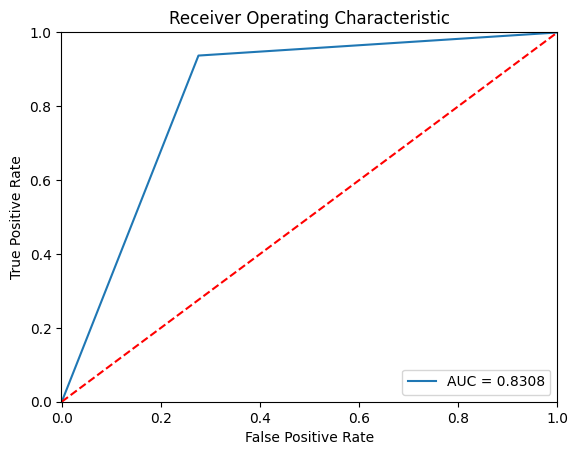

In [205]:
## Calculate the AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [206]:
## Calculating the confidence factor

cofidence_factor = 2.58 * np.sqrt( (accuracy * (1 - accuracy)) / y_test.shape[0])
cofidence_factor

0.12229537737016472

In [207]:
# Function to create the Keras model
def create_model(units=64):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(units, activation='relu')(input_layer)
    dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
    output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=True)

# Define a smaller hyperparameter space for grid search
param_grid = {
    'batch_size': [32, 64, 128],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring=['accuracy', 'roc_auc'], refit='roc_auc', cv=3, verbose=True)
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=True)

# Print the best parameters and corresponding accuracy
print("Accuracy is : %f using best parameters: %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_result.best_estimator_
best_model_main = grid_result.best_estimator_.model

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

print(f'Test AUC: {test_auc}, Test Accuracy: {test_accuracy}')

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/50
6/6 [==============================] - 1s 44ms/step - loss: 0.7039 - accuracy: 0.6025 - val_loss: 0.6755 - val_accuracy: 0.5410
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6371 - accuracy: 0.6460 - val_loss: 0.6217 - val_accuracy: 0.6721
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5908 - accuracy: 0.7081 - val_loss: 0.5822 - val_accuracy: 0.7377
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5525 - accuracy: 0.7205 - val_loss: 0.5492 - val_accuracy: 0.8689
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5227 - accuracy: 0.7888 - val_loss: 0.5213 - val_accuracy: 0.8689
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.4962 - accuracy: 0.8075 - val_loss: 0.4931 - val_accuracy: 0.8852
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4701 - accuracy: 0.8261 - val_loss:

### Saving the model

In [208]:
## Save the model
model = model.save('heart_prediction.h5')

In [209]:
## load the saved model to use for prediction
model = load_model('heart_prediction.h5')

# Building a mini predictive system here

In [212]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 1):
  print('You have a Heart Disease')
else:
  print('You do not have Heart Disease')

1/1 [==============================] - 0s 42ms/step
[[0.]]
You do not have Heart Disease
